#Theortical Questions

1. Can we use Bagging for regression problems?

--Yes, Bagging (Bootstrap Aggregating) can be used for regression by averaging the predictions from multiple base regressors. The BaggingRegressor in scikit-learn is designed for this purpose.

2. Difference between multiple model training and single model training.


Single model: One model is trained on the entire dataset, potentially leading to overfitting.

Multiple models (Ensemble): Several models are trained (e.g., on different bootstrapped samples), and their predictions are aggregated (average or majority voting), leading to better generalization.

3. Feature randomness in Random Forest.


In Random Forest, each tree is trained using a random subset of features at every split. This ensures decorrelation among trees and helps improve model performance by reducing variance.

4. What is OOB (Out-of-Bag) Score?

OOB score is an internal validation score in Bagging/Random Forest. It's calculated using data points not included in the bootstrap sample of a particular tree. It gives an unbiased estimate of model performance.

5. How to measure feature importance in Random Forest?

Two common methods:Sum of the impurity decrease brought by that feature across all trees.

Gini Importance: Sum of the impurity decrease brought by that feature across all trees.

Permutation Importance: Measures the decrease in model score when the feature’s values are randomly shuffled.

6. Working of Bagging Classifier

Bootstrapped samples from the dataset are created.

A base classifier (e.g., decision tree) is trained on each sample.

Predictions are combined using majority voting for classification.

7. Evaluate a Bagging Classifier’s performance

Use metrics like Accuracy, Precision, Recall, F1-score, and Confusion Matrix. Also, use cross-validation to estimate model stability.

8. How Bagging Regressor works

Same as the Bagging Classifier, but predictions are averaged instead of voted. It's suitable for continuous output.

9. Main advantage of ensemble techniques

Reduce variance (Bagging)

Reduce bias (Boosting)

Improve generalization

Handle overfitting better than individual models

10. Main challenge of ensemble methods

Increased computational cost

Harder to interpret

Risk of overfitting if not tuned well

11. Key idea behind ensemble techniques

Combine multiple weak learners to create a strong learner with better performance and generalization than individual models.

12. What is a Random Forest Classifier?

An ensemble of decision trees where each tree is trained on a bootstrapped dataset with feature randomness. Final prediction is based on majority vote.

13. Main types of ensemble techniques
Bagging

Boosting

Stacking

Voting

14. What is ensemble learning in ML?
Technique that combines predictions from multiple models to improve performance, accuracy, and robustness.

15. When should we avoid ensemble methods?
When interpretability is crucial

When data is very small

When computational resources are limited

16. How does Bagging reduce overfitting?
By training models on different subsets of data, it reduces variance and helps avoid overfitting the noise in the training set.

17. Why is Random Forest better than a single Decision Tree?
Less overfitting

More stable and accurate

Reduced variance

Better generalization

18. Role of bootstrap sampling in Bagging
It creates multiple different training datasets by sampling with replacement, which introduces diversity in the ensemble.

19. Real-world applications of ensemble techniques
Fraud detection (banking)

Medical diagnosis

Spam filtering

Recommendation systems

Stock price prediction

20. Difference between Bagging and Boosting
Aspect	Bagging	Boosting
Focus	Reduce variance	Reduce bias
Training	Parallel	Sequential
Sample weight	Equal	Adjusted based on error
Overfitting	Lower risk	Can overfit if not regularized.


#Practical Questions

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Classification dataset
X_c, y_c = load_breast_cancer(return_X_y=True)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

# Regression dataset
X_r, y_r = load_diabetes(return_X_y=True)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)


21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train_c, y_train_c)
print("Bagging Classifier Accuracy:", bag_clf.score(X_test_c, y_test_c))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

bag_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train_r, y_train_r)
y_pred_r = bag_reg.predict(X_test_r)
print("Bagging Regressor MSE:", mean_squared_error(y_test_r, y_pred_r))


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_c, y_train_c)

for feature, importance in zip(load_breast_cancer().feature_names, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree2.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_r, y_train_r)
rf_mse = mean_squared_error(y_test_r, rf_reg.predict(X_test_r))

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_r, y_train_r)
tree_mse = mean_squared_error(y_test_r, tree_reg.predict(X_test_r))

print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", tree_mse)


25. 2 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [ ]:
rf_oob = RandomForestClassifier(oob_score=True, random_state=42)
rf_oob.fit(X_train_c, y_train_c)
print("OOB Score:", rf_oob.oob_score_)


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:
from sklearn.svm import SVC

bag_svm = BaggingClassifier(base_estimator=SVC(probability=True), n_estimators=10, random_state=42)
bag_svm.fit(X_train_c, y_train_c)
print("Bagging SVM Accuracy:", bag_svm.score(X_test_c, y_test_c))


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [ ]:
for n in [10, 50, 100]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_c, y_train_c)
    acc = model.score(X_test_c, y_test_c)
    print(f"{n} Trees Accuracy: {acc:.4f}")


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

bag_lr = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=42)
bag_lr.fit(X_train_c, y_train_c)
y_prob = bag_lr.predict_proba(X_test_c)[:, 1]
print("Bagging Logistic Regression AUC Score:", roc_auc_score(y_test_c, y_prob))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

29. Train a Random Forest Regressor and analyze feature importance scores.

In [5]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_r, y_train_r)

importances = rf_reg.feature_importances_
features = load_diabetes().feature_names
for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")


NameError: name 'X_train_r' is not defined

30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [6]:
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

bag_model.fit(X_train_c, y_train_c)
rf_model.fit(X_train_c, y_train_c)

print("Bagging Accuracy:", bag_model.score(X_test_c, y_test_c))
print("Random Forest Accuracy:", rf_model.score(X_test_c, y_test_c))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid.fit(Xc_train, yc_train)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(yc_test, grid.predict(Xc_test)))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9590643274853801


32. Train a Bagging Regressor with different numbers of base estimators and compare performance=

In [8]:
from sklearn.ensemble import BaggingRegressor

for n in [10, 50, 100]:
    model = BaggingRegressor(n_estimators=n, random_state=42)
    model.fit(Xr_train, yr_train)
    pred = model.predict(Xr_test)
    print(f"{n} Estimators - MSE: {mean_squared_error(yr_test, pred)}")


10 Estimators - MSE: 3237.526541353384
50 Estimators - MSE: 2987.0073593984966
100 Estimators - MSE: 2908.80615037594


33. Train a Random Forest Classifier and analyze misclassified samples.

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(Xc_train, yc_train)
pred = rf.predict(Xc_test)
misclassified = (pred != yc_test)
print("Number of Misclassified Samples:", misclassified.sum())


Number of Misclassified Samples: 5


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(Xc_train, yc_train)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(Xc_train, yc_train)

print("Bagging Accuracy:", accuracy_score(yc_test, bag.predict(Xc_test)))
print("Decision Tree Accuracy:", accuracy_score(yc_test, tree.predict(Xc_test)))


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

35. = Train a Random Forest Classifier and visualize the confusion matrix.

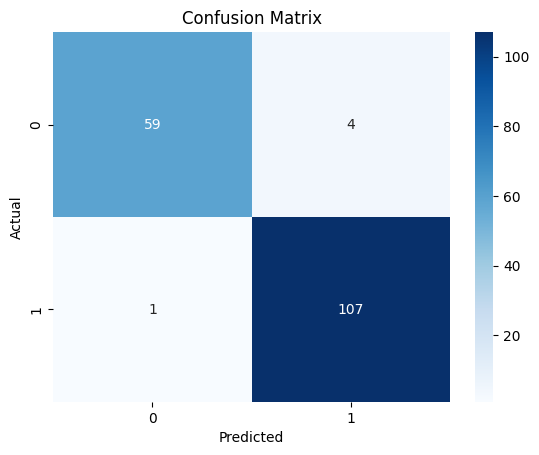

In [11]:
cm = confusion_matrix(yc_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

base = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression())
]
stack = StackingClassifier(estimators=base, final_estimator=LogisticRegression())
stack.fit(Xc_train, yc_train)
print("Stacking Accuracy:", accuracy_score(yc_test, stack.predict(Xc_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Accuracy: 0.9766081871345029


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

37. Train a Random Forest Classifier and print the top 5 most important features.

In [13]:
importances = rf.feature_importances_
feat_names = load_breast_cancer().feature_names
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
print(imp_df.sort_values(by='Importance', ascending=False).head())


                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [14]:
y_pred = bag.predict(Xc_test)
print("Precision:", precision_score(yc_test, y_pred))
print("Recall:", recall_score(yc_test, y_pred))
print("F1 Score:", f1_score(yc_test, y_pred))


NameError: name 'bag' is not defined

39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

In [15]:
for depth in [2, 4, 6, 8, 10, None]:
    clf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf.fit(Xc_train, yc_train)
    acc = accuracy_score(yc_test, clf.predict(Xc_test))
    print(f"max_depth={depth} => Accuracy: {acc}")


max_depth=2 => Accuracy: 0.9532163742690059
max_depth=4 => Accuracy: 0.9707602339181286
max_depth=6 => Accuracy: 0.9649122807017544
max_depth=8 => Accuracy: 0.9707602339181286
max_depth=10 => Accuracy: 0.9707602339181286
max_depth=None => Accuracy: 0.9707602339181286


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

In [16]:
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    br = BaggingRegressor(base_estimator=base, n_estimators=50, random_state=42)
    br.fit(Xr_train, yr_train)
    pred = br.predict(Xr_test)
    print(f"{base.__class__.__name__} MSE: {mean_squared_error(yr_test, pred)}")


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [18]:
y_probs = rf.predict_proba(Xc_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(yc_test, y_probs))


ROC AUC Score: 0.9968400940623163


42. Train a Bagging Classifier and evaluate its performance using cross-validatio.

In [19]:
scores = cross_val_score(bag, X_c, y_c, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))


NameError: name 'bag' is not defined

43. Train a Random Forest Classifier and plot the Precision-Recall curve.

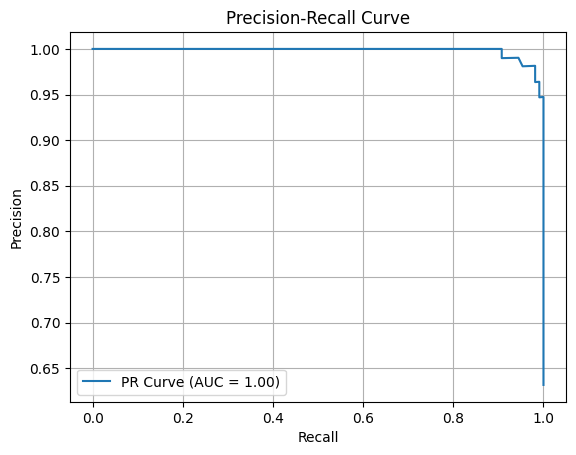

In [20]:
from sklearn.metrics import precision_recall_curve, auc

prec, rec, _ = precision_recall_curve(yc_test, y_probs)
plt.plot(rec, prec, label=f'PR Curve (AUC = {auc(rec, prec):.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


44.  Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [21]:
stack2 = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression())
], final_estimator=LogisticRegression())

stack2.fit(Xc_train, yc_train)
print("Stacking Accuracy:", accuracy_score(yc_test, stack2.predict(Xc_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Accuracy: 0.9766081871345029


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [22]:
for bootstrap_val in [True, False]:
    br = BaggingRegressor(n_estimators=50, bootstrap=bootstrap_val, random_state=42)
    br.fit(Xr_train, yr_train)
    pred = br.predict(Xr_test)
    print(f"Bootstrap={bootstrap_val} => MSE: {mean_squared_error(yr_test, pred)}")


Bootstrap=True => MSE: 2987.0073593984966
Bootstrap=False => MSE: 5190.679618045113
